# Latest Mark 0

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

# F1

In [2]:
def read_files(ddir):
    images = dict()
    ACCEPTED_FORMAT = ['jpg', 'png']
    for d in os.listdir(ddir):
        if d.split('.')[1].lower() in ACCEPTED_FORMAT:
            fname = d.split('.')[0]
            print(f'reading {os.path.join(ddir, d)}...')
            images[fname] = cv2.imread(os.path.join(ddir, d))
            images[fname] = cv2.cvtColor(images[fname], cv2.COLOR_BGR2RGB)
    return images

def display_all(imgs, subs=(10,10), fgsz=(15,18), use_gray=False):
    fig, axs = plt.subplots(subs[0], subs[1], figsize=fgsz)
    k = 0
    for i in range(subs[0]):
        for j in range(subs[1]):
            axs[i, j].imshow(list(imgs.values())[k], 'gray' if use_gray else None)
            axs[i, j].set_title(list(imgs.keys())[k])
            axs[i, j].axis('off')
            k+=1
            
def display_all_with(imgs, cc, subs=(10,10), fgsz=(15,18), use_gray=True):
    fig, axs = plt.subplots(subs[0], subs[1], figsize=fgsz)
    k = 0
    for i in range(subs[0]):
        for j in range(subs[1]):
            axs[i, j].imshow(list(imgs.values())[k][:,:,cc], cmap='gray' if use_gray else None)
            axs[i, j].set_title(list(imgs.keys())[k])
            axs[i, j].axis('off')
            k+=1
            
def adjust_gamma(image, gamma=1.0):
    table = np.array([((i / 255.0) ** gamma) * 255
      for i in np.arange(0, 256)]).astype("uint8")

    return cv2.LUT(image, table)

# Preprocessing Functions

# Main

In [3]:
POSITIVE = r'/home/tsdhrm/Pictures/thesis/dataset/100Data/POSITIVE'
NEGATIVE = r'/home/tsdhrm/Pictures/thesis/dataset/100Data/NEGATIVE'

In [4]:
pos = read_files(POSITIVE)

reading /home/tsdhrm/Pictures/thesis/dataset/100Data/POSITIVE/r3_G-1-L_left_half.png...
reading /home/tsdhrm/Pictures/thesis/dataset/100Data/POSITIVE/drishtiGS_005.png...
reading /home/tsdhrm/Pictures/thesis/dataset/100Data/POSITIVE/r2_Im404.png...
reading /home/tsdhrm/Pictures/thesis/dataset/100Data/POSITIVE/drishtiGS_069.png...
reading /home/tsdhrm/Pictures/thesis/dataset/100Data/POSITIVE/drishtiGS_024.png...
reading /home/tsdhrm/Pictures/thesis/dataset/100Data/POSITIVE/r3_S-32-L_left_half.png...
reading /home/tsdhrm/Pictures/thesis/dataset/100Data/POSITIVE/r2_Im429.png...
reading /home/tsdhrm/Pictures/thesis/dataset/100Data/POSITIVE/r2_Im444.png...
reading /home/tsdhrm/Pictures/thesis/dataset/100Data/POSITIVE/r2_Im418.png...
reading /home/tsdhrm/Pictures/thesis/dataset/100Data/POSITIVE/drishtiGS_031.png...
reading /home/tsdhrm/Pictures/thesis/dataset/100Data/POSITIVE/11_g.jpg...
reading /home/tsdhrm/Pictures/thesis/dataset/100Data/POSITIVE/drishtiGS_016.png...
reading /home/tsdhrm/P

In [5]:
len(pos.keys())

84

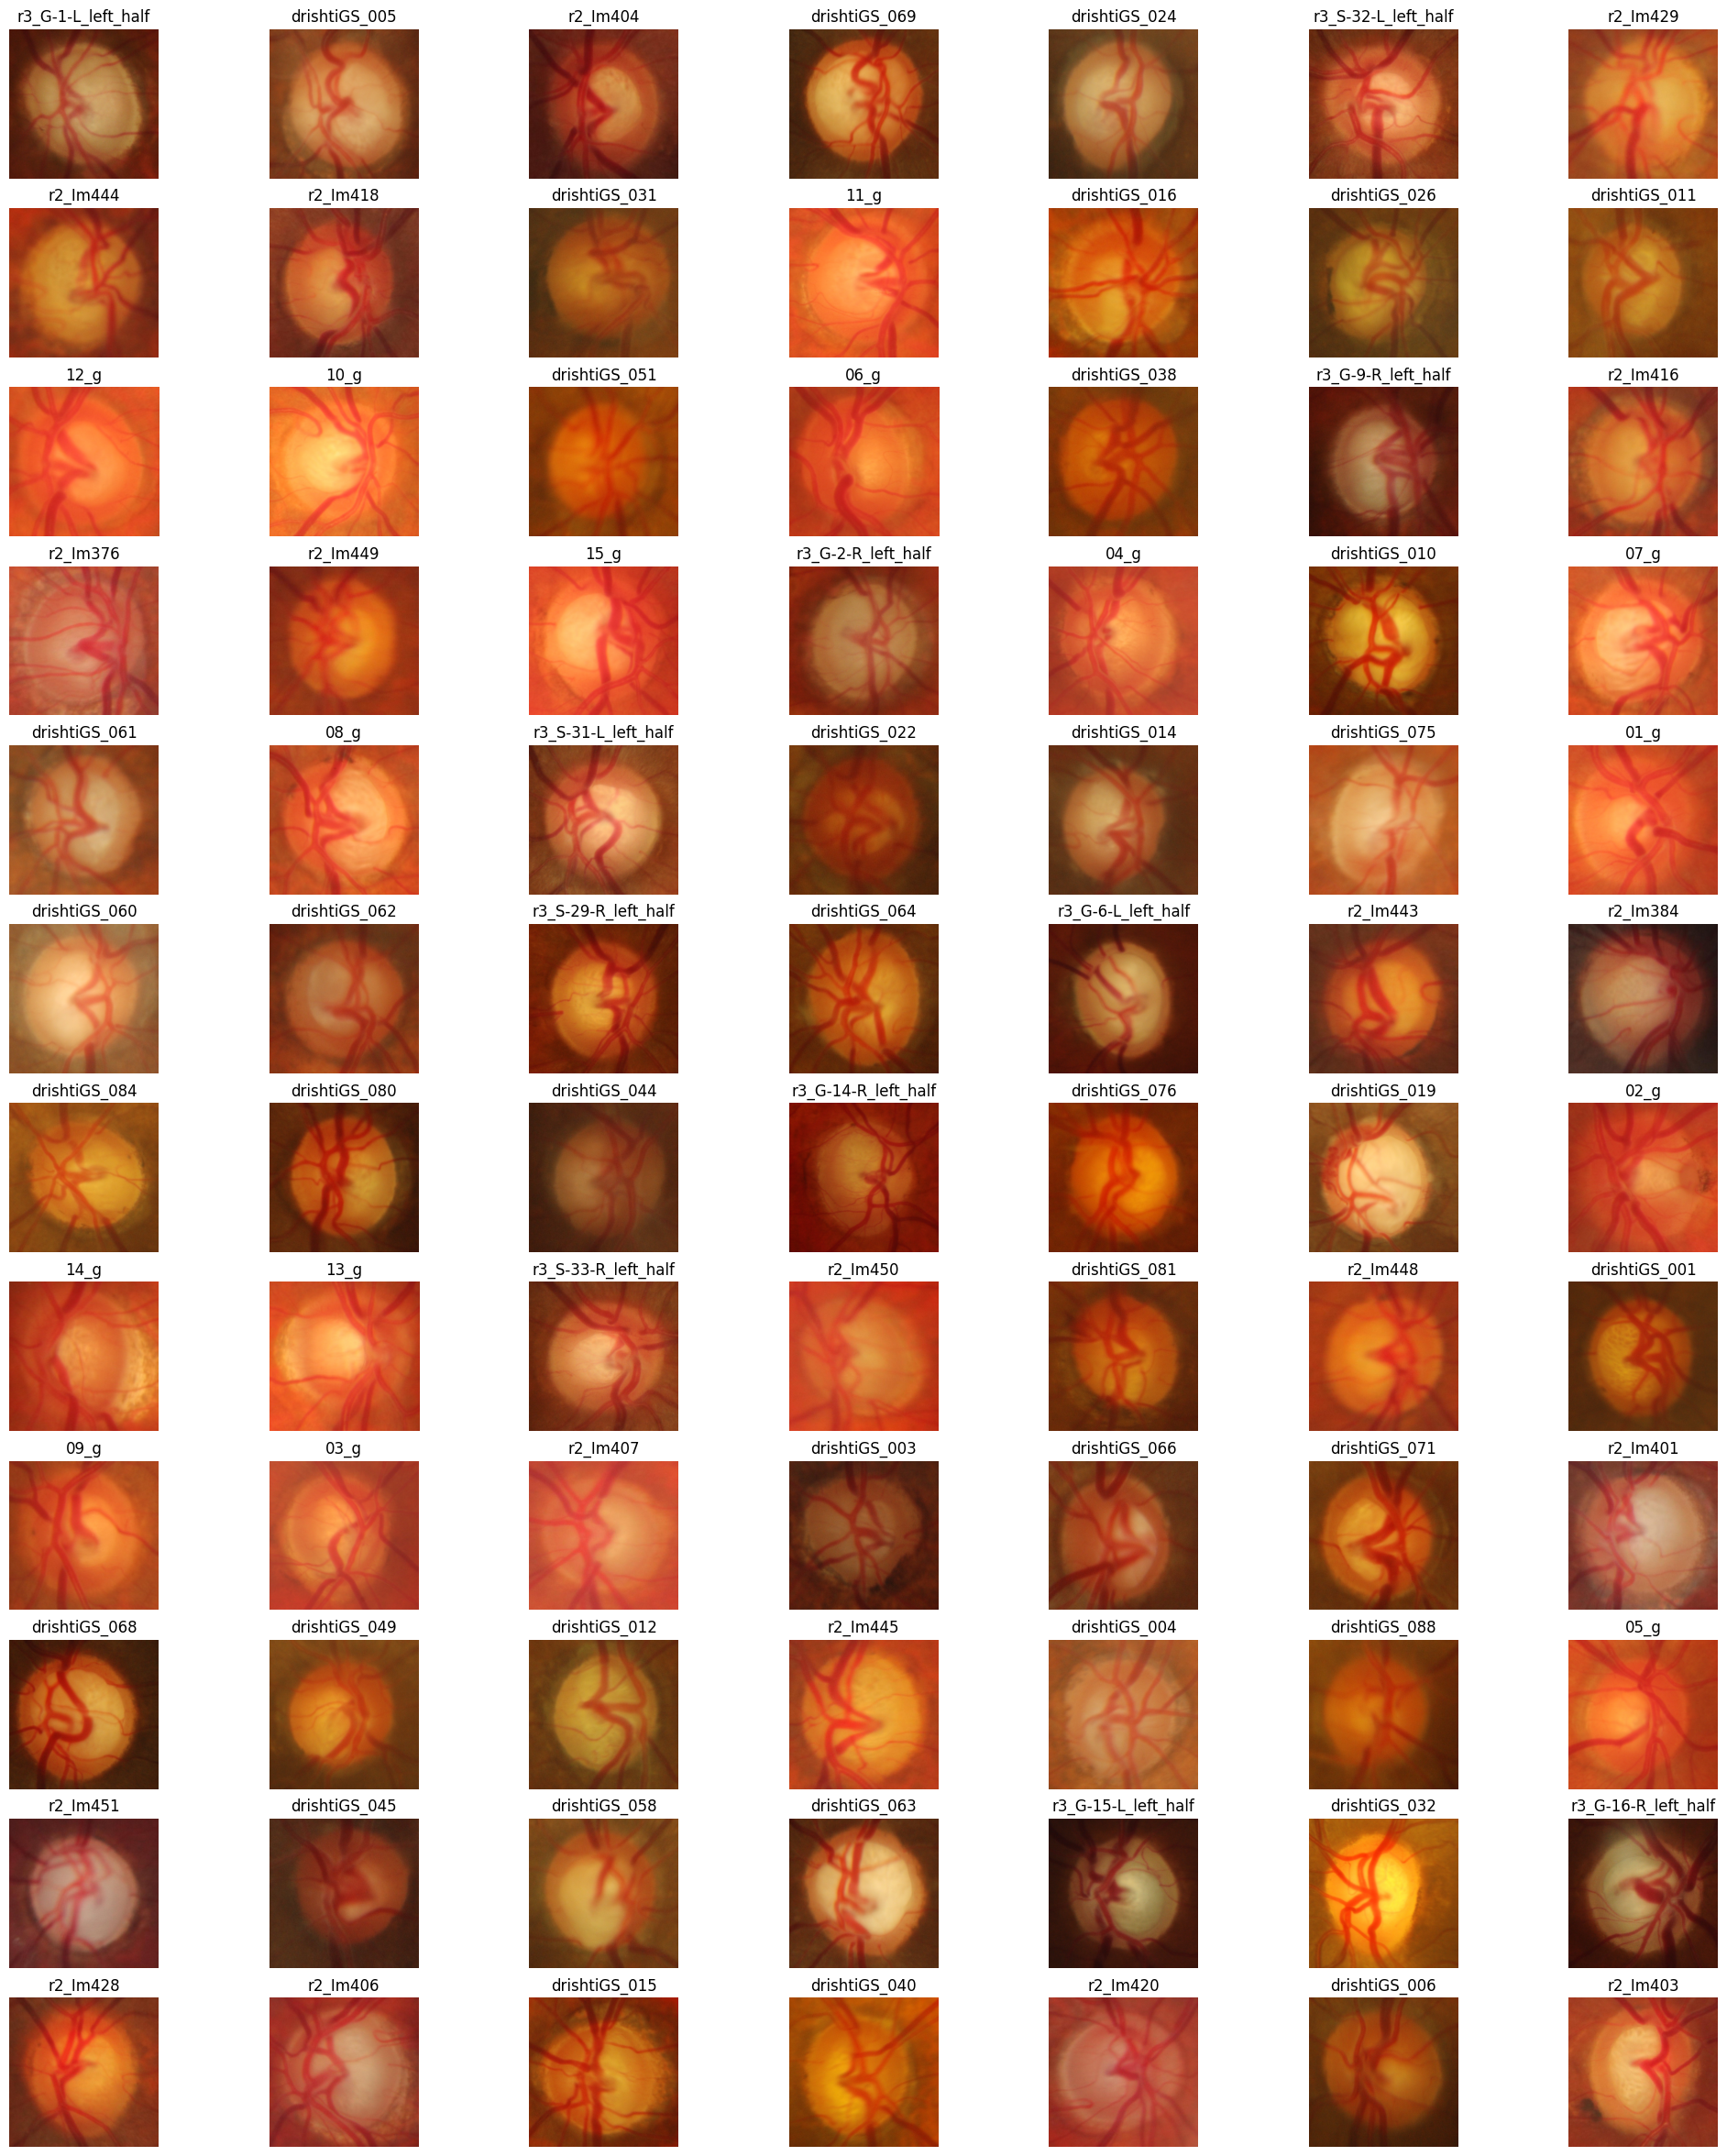

In [6]:
display_all(pos, (12,7), (25,30))

In [7]:
def remove_vessels(imgs):
    p = {}
    no_vsl = {}
    clahe = cv2.createCLAHE(3, (8,8))
    for img in imgs:
        g = imgs[img][:,:,1].copy()
        g_inv = 255-g
        clahed = clahe.apply(g_inv)
        g_gamma = adjust_gamma(clahed, 5)
        g_gauss = cv2.GaussianBlur(g_gamma, (15,15),0)
        ret, th = cv2.threshold(g_gauss.copy(),0,255,
                                cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        no_vsl[img] = cv2.inpaint(imgs[img].copy(), th, 3,cv2.INPAINT_TELEA)
    # display_all(p, (12,7), (25,30), use_gray=True)
    # display_all(p, (12,7), (25,30))
    return no_vsl

In [8]:
wo_vsl = remove_vessels(pos)

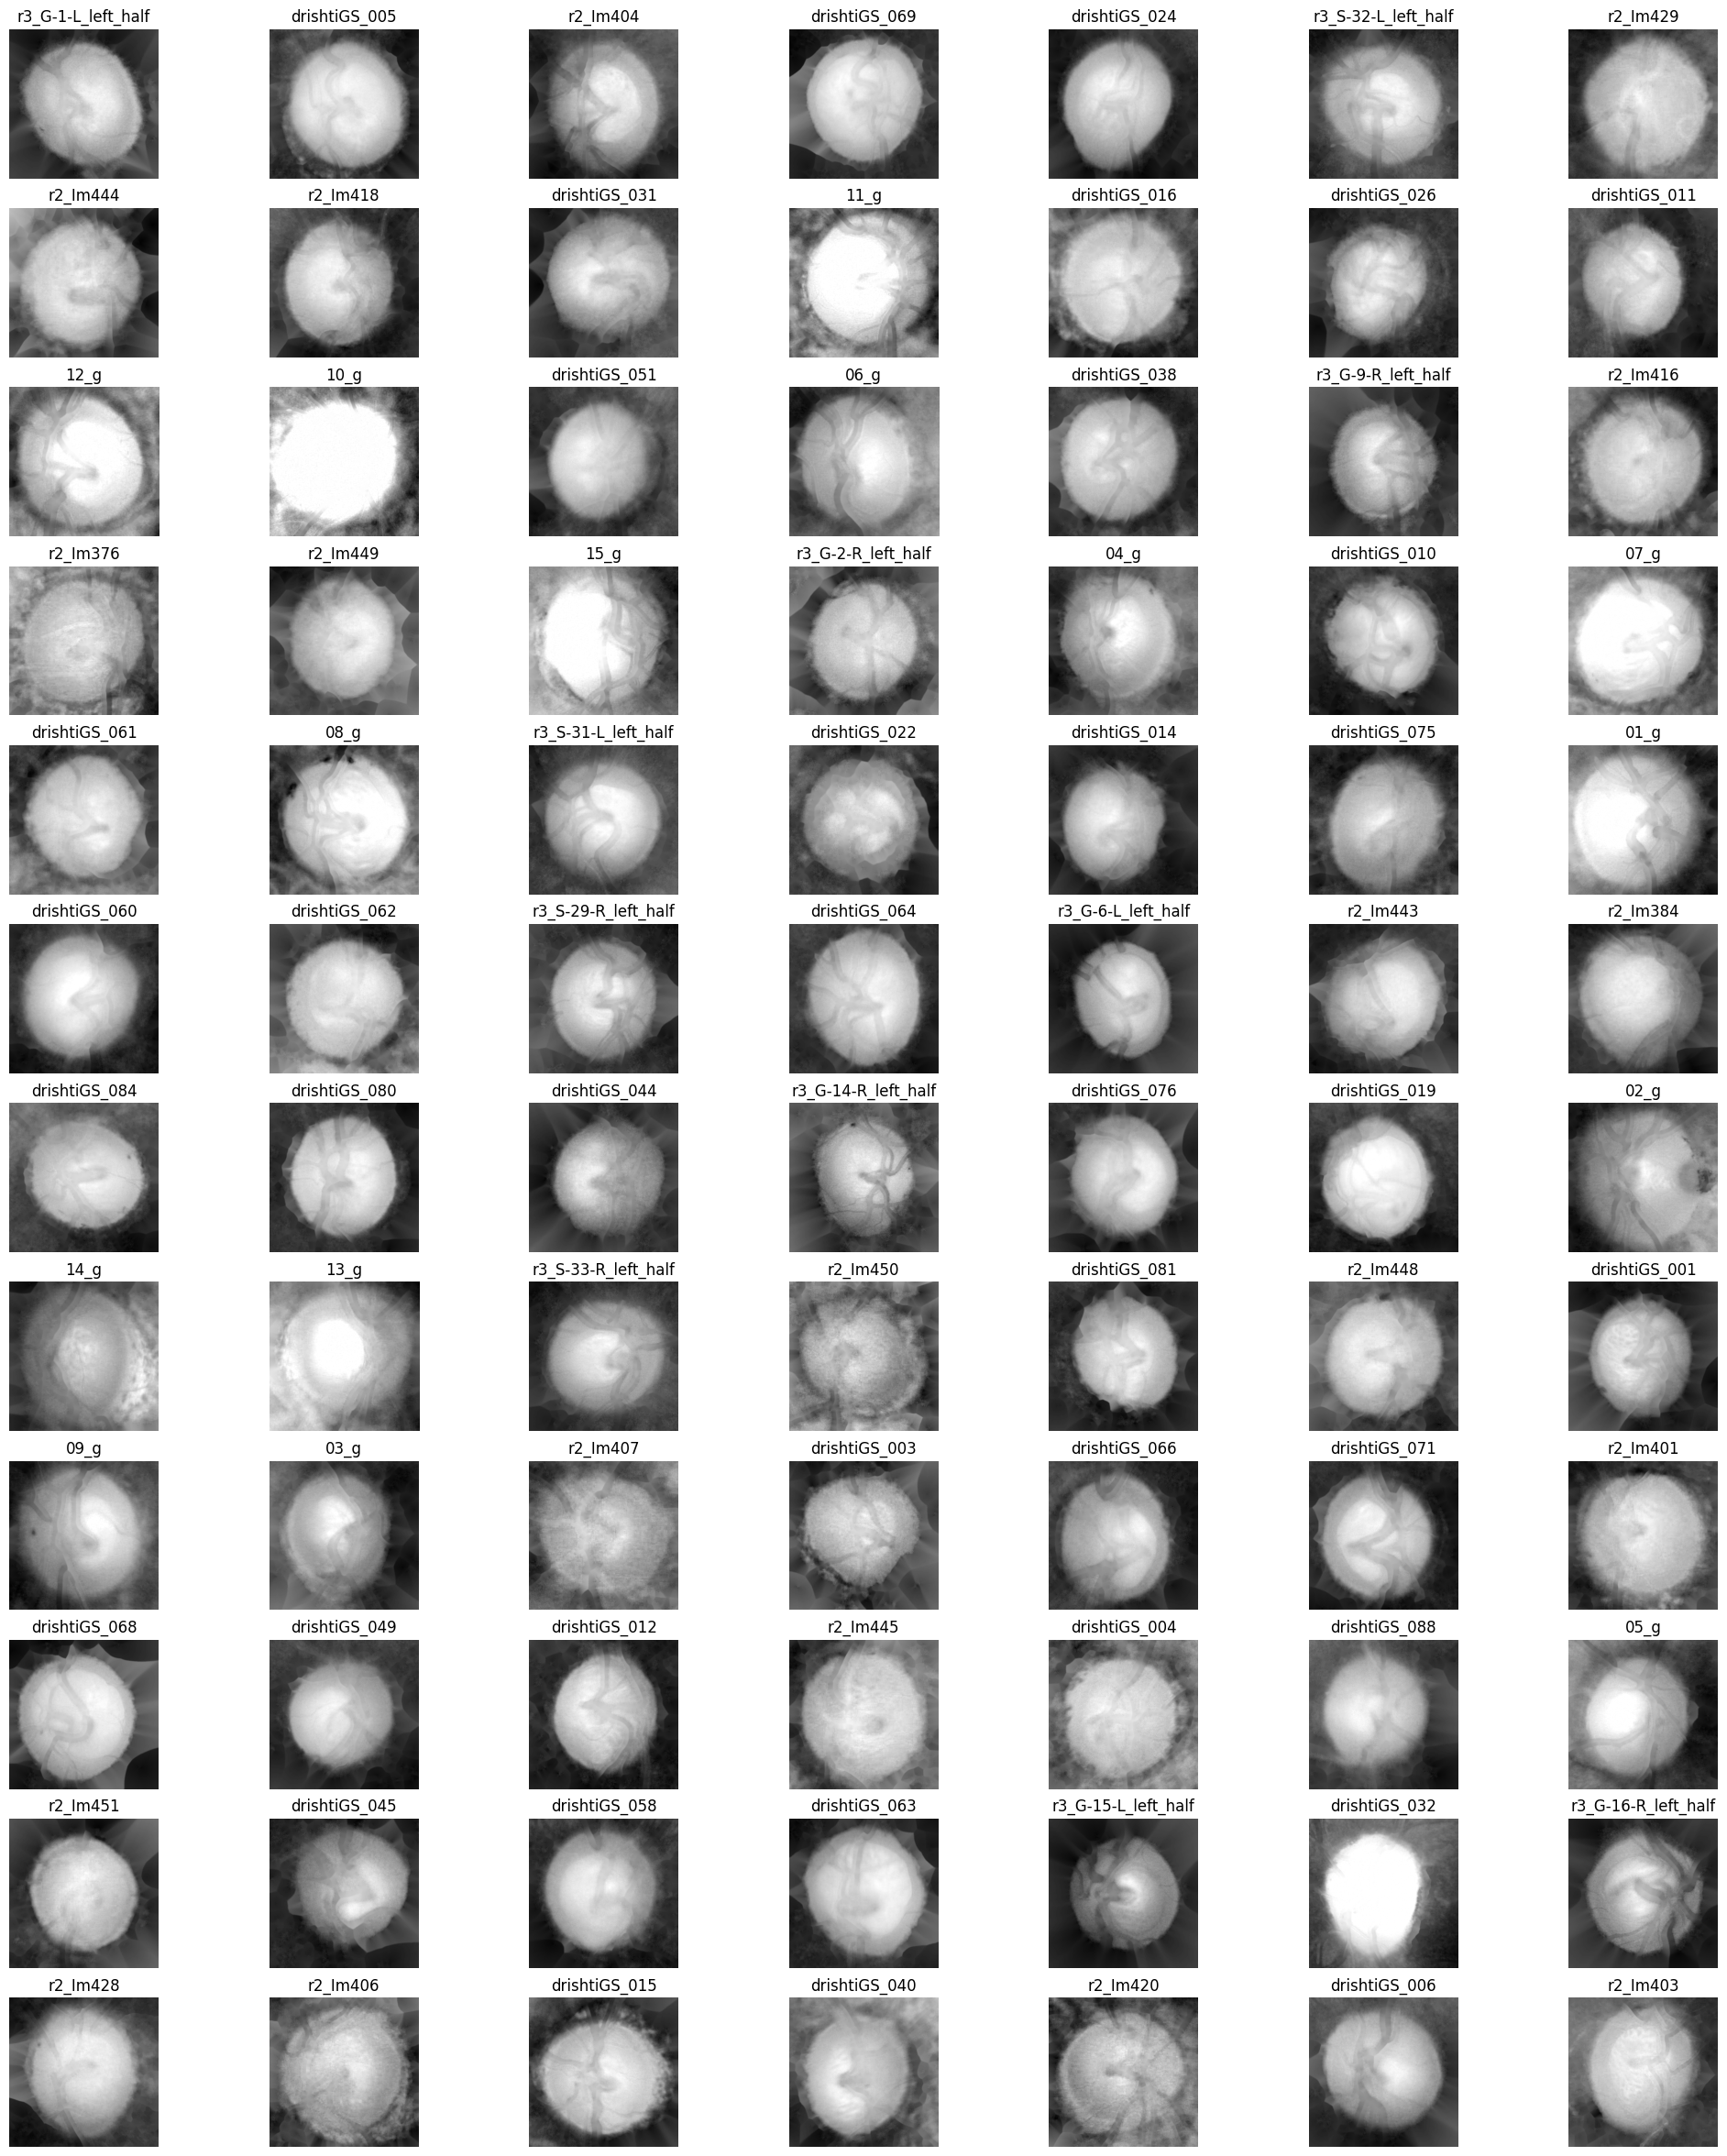

In [9]:
display_all_with(wo_vsl, 0, (12,7), (25,30))

In [10]:
def extract_od(imgs):
    # tidak harus ada drawn_roi
    p = {}
    drawn_roi = {}
    ods = {}
    clahe = cv2.createCLAHE(3, (16,16))
    for img in imgs:
        red = imgs[img][:,:,0]
        gmcr = adjust_gamma(red, 2)
        p[img] = clahe.apply(gmcr)
        # gmcr_bl = cv2.GaussianBlur(gmclahe, (15,15), 0)
        # gmcr_bl = cv2.medianBlur(gmclahe, 11)
        # erosion = cv2.erode(gmcr_bl.copy(), kernel=np.ones((20,20), np.uint8))
        # dilation = cv2.dilate(erosion, kernel=np.ones((15,15), np.uint8))
        # ret2, th2 = cv2.threshold(dilation,0,255,
        #                           cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        # cont, hcy = cv2.findContours(th2.copy(), 
        #                              cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        # ellipse = get_which_ellipse(cont)
        # (x,y),radius = get_circle(cont)
        # center = (int(x),int(y))
        # radius = int(radius)
        # drawn_roi[img] = cv2.circle(imgs[img],center,radius,(0,255,0), 2)
        # od = np.zeros_like(th2, dtype='uint8')
        # od = cv2.circle(od, center, radius, (255, 255, 255), -1)
        # ods[img] = od
        #display_all(ods, (4,5))
    return drawn_roi, ods

In [ ]:
od_line, all_od = extract_od(wo_vsl)